In [107]:
## W tym projekcie wykorzystamy dane z sezonu NBA 2017-2018 do przewidywania liczby punktów zdobytych przez gracza. 
## Podzielimy nasz pełny zestaw danych na zestawy treningowe i testowe. Następnie przeprowadzimy analizy eksploracyjne na zbiorze
## uczącym, które pomogą nam ocenić, które cechy powinny być użyte w naszym modelu. Następnie możemy wykorzystać zasady uczenia
## maszynowego do trenowania modelu, który przewiduje liczbę punktów na mecz dla danego wyniku gracza.
## Przed rozpoczęciem należy zauważyć, że nie próbujemy określić, jak cenny jest gracz dla drużyny w sposób, 
## w jaki próbują to zrobić wskaźniki, takie jak udziały w wygranych i wartość zamiast zastępowania.
## Po prostu próbujemy stworzyć model, który bierze pod uwagę statystyki gracza i odgaduje, ile punktów zdobędzie na mecz.

In [108]:
# Algebra liniowa
import numpy as np

# Przetwarzanie danych
import pandas as pd

# Wizualizacja danych
import seaborn as sns
sns.set()

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Algorytmy:
# Regresja liniowa 
# Regresja drzewa decyzyjnego

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, explained_variance_score as EVS, mean_squared_error as MSE

In [109]:
# Dane 'https://raw.githubusercontent.com/evanpfeifer/nba-player-data/master/Players.csv'
# Dane 'https://raw.githubusercontent.com/evanpfeifer/nba-player-data/master/player_data.csv'
url = 'https://raw.githubusercontent.com/evanpfeifer/nba-player-data/master/Seasons_Stats.csv'
df = pd.read_csv(url)

In [110]:
df.loc[df.Player=="LeBron James"]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
16746,16746,2004.0,LeBron James,SG,19.0,CLE,79.0,79.0,3122.0,18.3,...,0.754,99.0,333.0,432.0,465.0,130.0,58.0,273.0,149.0,1654.0
17344,17344,2005.0,LeBron James,SF,20.0,CLE,80.0,80.0,3388.0,25.7,...,0.750,111.0,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0
17918,17918,2006.0,LeBron James,SF,21.0,CLE,79.0,79.0,3361.0,28.1,...,0.738,75.0,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0
18460,18460,2007.0,LeBron James,SF,22.0,CLE,78.0,78.0,3190.0,24.5,...,0.698,83.0,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0
19017,19017,2008.0,LeBron James,SF,23.0,CLE,75.0,74.0,3027.0,29.1,...,0.712,133.0,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0
19611,19611,2009.0,LeBron James,SF,24.0,CLE,81.0,81.0,3054.0,31.7,...,0.780,106.0,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0
20207,20207,2010.0,LeBron James,SF,25.0,CLE,76.0,76.0,2966.0,31.1,...,0.767,71.0,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0
20812,20812,2011.0,LeBron James,SF,26.0,MIA,79.0,79.0,3063.0,27.3,...,0.759,80.0,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0
21395,21395,2012.0,LeBron James,SF,27.0,MIA,62.0,62.0,2326.0,30.7,...,0.771,94.0,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0
21933,21933,2013.0,LeBron James,PF,28.0,MIA,76.0,76.0,2877.0,31.6,...,0.753,97.0,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0


In [111]:
# Filtrujemy sezon 2017/2018
df = df[df['Year'] == 2017]
df.head()


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24096,24096,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
24097,24097,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
24098,24098,2017.0,Quincy Acy,PF,26.0,DAL,6.0,0.0,48.0,-1.4,...,0.667,2.0,6.0,8.0,0.0,0.0,0.0,2.0,9.0,13.0
24099,24099,2017.0,Quincy Acy,PF,26.0,BRK,32.0,1.0,510.0,13.1,...,0.754,18.0,89.0,107.0,18.0,14.0,15.0,19.0,58.0,209.0
24100,24100,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0


In [112]:
# Uwzględnij tylko „TOT” dla graczy, którzy grali w wielu drużynach
tot_df = df.loc[df.Tm=='TOT']
players2 = tot_df['Player']
df.drop(tot_df.index + 1, axis=0, inplace=True)
df.drop(tot_df.index + 2, axis=0, inplace=True)
df.drop(24357, axis=0, inplace=True)
df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24096,24096,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
24097,24097,2017.0,Quincy Acy,PF,26.0,TOT,38.0,1.0,558.0,11.8,...,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,222.0
24100,24100,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
24101,24101,2017.0,Arron Afflalo,SG,31.0,SAC,61.0,45.0,1580.0,9.0,...,0.892,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0
24102,24102,2017.0,Alexis Ajinca,C,28.0,NOP,39.0,15.0,584.0,12.9,...,0.725,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0


In [113]:
# All features we selected:

# Pos: pozycja
# Age: wiek
# Tm: drużyna
# G: mecze
# MP: minuty na jeden mecz
# PER: wskaźnik stosowany w NBA do ocenienia gracza
# TS%: procent skuteczności
# TRB%: wszystkie zbiórki gracza %
# STL%: przechwyty %
# TOV%: straty %
# FGA: próby rzutów na mecz
# 3P: Próby 3-punktowych rzutów z akcji
# 3P%: skuteczność 3-punktowego rzutu z akcji
# 2P: Próby 2-punktowych rzutów z akcji
# 2P%: skuteczność 2-punktowego rzutu z akcji
# eFG%: skuteczność rzutów za 2 i za 3 punkty
# PTS: punkty na mecz

In [114]:
features = ['Player', 'Pos', 'Age', 'G', 'MP', 'PER', 'TS%', 'TRB%', 'STL%', 'TOV%', 'FGA', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'PTS']

df = df[features]

# Zmiana wartośći rozegranych minut, skuteczności rzutów i punktów na mecz
df['MP'] = df['MP'] / df['G']
df['FGA'] = df['FGA'] / df['G']
df['PTS'] = df['PTS'] / df['G']

df.head()

,Player,Pos,Age,G,MP,PER,TS%,TRB%,STL%,TOV%,FGA,3P,3PA,3P%,2P,2PA,2P%,eFG%,PTS
24096,Alex Abrines,SG,23.0,68.0,15.514706,10.1,0.560,4.5,1.7,8.3,5.014706,94.0,247.0,0.381,40.0,94.0,0.426,0.531,5.970588
24097,Quincy Acy,PF,26.0,38.0,14.684211,11.8,0.565,11.0,1.2,9.7,4.473684,37.0,90.0,0.411,33.0,80.0,0.413,0.521,5.842105
24100,Steven Adams,C,23.0,80.0,29.862500,16.5,0.589,14.2,1.8,16.0,8.187500,0.0,1.0,0.000,374.0,654.0,0.572,0.571,11.312500
24101,Arron Afflalo,SG,31.0,61.0,25.901639,9.0,0.559,4.6,0.7,8.4,6.885246,62.0,151.0,0.411,123.0,269.0,0.457,0.514,8.442623
24102,Alexis Ajinca,C,28.0,39.0,14.974359,12.9,0.529,16.0,1.7,13.7,4.564103,0.0,4.0,0.000,89.0,174.0,0.511,0.500,5.307692


In [115]:
df.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 24096 to 24690
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  488 non-null    object 
 1   Pos     488 non-null    object 
 2   Age     488 non-null    float64
 3   G       488 non-null    float64
 4   MP      488 non-null    float64
 5   PER     488 non-null    float64
 6   TS%     487 non-null    float64
 7   TRB%    488 non-null    float64
 8   STL%    488 non-null    float64
 9   TOV%    487 non-null    float64
 10  FGA     488 non-null    float64
 11  3P      488 non-null    float64
 12  3PA     488 non-null    float64
 13  3P%     452 non-null    float64
 14  2P      488 non-null    float64
 15  2PA     488 non-null    float64
 16  2P%     486 non-null    float64
 17  eFG%    487 non-null    float64
 18  PTS     488 non-null    float64
dtypes: float64(17), object(2)
memory usage: 76.2+ KB


In [116]:
# Rozdzielanie danych na treningowe i testowe

shuffled = df.sample(frac=1, replace=False, random_state=1)
train_df = shuffled.iloc[np.arange(390)]
test_df = shuffled.iloc[np.arange(390, 487)]
     

In [117]:
train_df.head()

,Player,Pos,Age,G,MP,PER,TS%,TRB%,STL%,TOV%,FGA,3P,3PA,3P%,2P,2PA,2P%,eFG%,PTS
24522,Chris Paul,PG,31.0,61.0,31.491803,26.2,0.614,8.8,3.1,14.0,12.868852,124.0,302.0,0.411,250.0,483.0,0.518,0.555,18.098361
24225,Luol Deng,SF,31.0,56.0,26.535714,10.1,0.470,10.8,1.6,8.7,7.571429,51.0,165.0,0.309,113.0,259.0,0.436,0.447,7.589286
24299,Gerald Green,SF,31.0,47.0,11.446809,12.0,0.524,8.8,0.8,9.1,4.936170,39.0,111.0,0.351,56.0,121.0,0.463,0.494,5.574468
24604,Edy Tavares,C,24.0,2.0,14.000000,21.3,0.633,21.6,0.0,24.0,2.500000,0.0,0.0,NaN,4.0,5.0,0.800,0.800,4.000000
24589,Ish Smith,PG,28.0,81.0,24.135802,14.7,0.477,6.6,1.6,12.4,9.246914,28.0,105.0,0.267,301.0,644.0,0.467,0.458,9.358025


In [118]:
# Dziesięciu najlepszych graczy, którzy rzucili najwięcej punktów
train_df.sort_values(by=['PTS'], ascending=False).head(10)

,Player,Pos,Age,G,MP,PER,TS%,TRB%,STL%,TOV%,FGA,3P,3PA,3P%,2P,2PA,2P%,eFG%,PTS
24654,Russell Westbrook,PG,28.0,81.0,34.592593,30.6,0.554,17.1,2.3,15.9,23.962963,200.0,583.0,0.343,624.0,1358.0,0.459,0.476,31.580247
24306,James Harden,PG,27.0,81.0,36.382716,27.3,0.613,12.2,2.0,19.5,18.925926,262.0,756.0,0.347,412.0,777.0,0.530,0.525,29.086420
24612,Isaiah Thomas,PG,27.0,76.0,33.802632,26.5,0.625,4.4,1.4,10.7,19.381579,245.0,646.0,0.379,437.0,827.0,0.528,0.546,28.934211
24218,Anthony Davis,C,23.0,75.0,36.106667,27.5,0.579,17.3,1.7,9.1,20.360000,40.0,134.0,0.299,730.0,1393.0,0.524,0.517,27.986667
24226,DeMar DeRozan,SG,27.0,74.0,35.405405,24.0,0.552,8.3,1.5,9.0,20.878378,33.0,124.0,0.266,688.0,1421.0,0.484,0.477,27.297297
24206,DeMarcus Cousins,C,26.0,72.0,34.236111,25.7,0.562,18.2,2.0,13.5,19.902778,131.0,364.0,0.360,516.0,1069.0,0.483,0.497,26.972222
24365,LeBron James,SF,32.0,74.0,37.756757,27.0,0.619,12.6,1.6,16.1,18.162162,124.0,342.0,0.363,612.0,1002.0,0.611,0.594,26.405405
24414,Kawhi Leonard,SF,25.0,74.0,33.432432,27.5,0.611,9.8,2.7,9.1,17.716216,147.0,386.0,0.381,489.0,925.0,0.529,0.541,25.513514
24216,Stephen Curry,PG,28.0,79.0,33.392405,24.6,0.624,7.3,2.6,13.0,18.265823,324.0,789.0,0.411,351.0,654.0,0.537,0.580,25.303797
24625,Karl-Anthony Towns,C,21.0,82.0,36.951220,26.0,0.618,19.4,1.0,11.3,18.036585,101.0,275.0,0.367,701.0,1204.0,0.582,0.576,25.134146


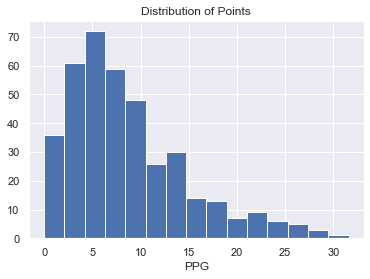

In [119]:
# Podział punktów na 15 "koszyków"
plt.hist(train_df['PTS'], bins=15)
plt.title('Distribution of Points')
plt.xlabel('PPG')
plt.show()

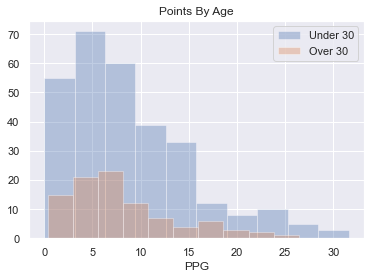

In [120]:
# Porównanie "punktów na jeden mecz" dla graczy w wieku powyżej i poniżej 30 lat
under_30 = train_df.loc[train_df.Age < 30].PTS
over_30 = train_df.loc[train_df.Age >= 30].PTS

plt.hist(x=under_30, alpha=0.35, label='Under 30')
plt.hist(x=over_30, alpha=0.35, label='Over 30')
plt.legend()
plt.xlabel('PPG')
plt.title('Points By Age')
plt.show() 
     

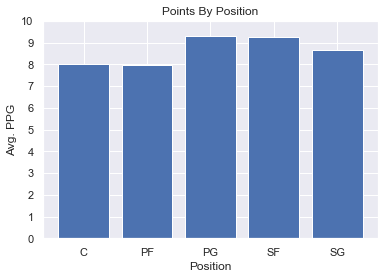

In [121]:
# Średnia liczba punktów na poszczególnych pozycjach na parkiecie
grouped_position = train_df[['Pos', 'PTS']].groupby(by=['Pos']).mean()

plt.bar(grouped_position.index, height=grouped_position.PTS)
plt.xlabel('Position')
plt.ylabel('Avg. PPG')
plt.title('Points By Position')
plt.yticks(np.arange(0, 11))
plt.show()
     

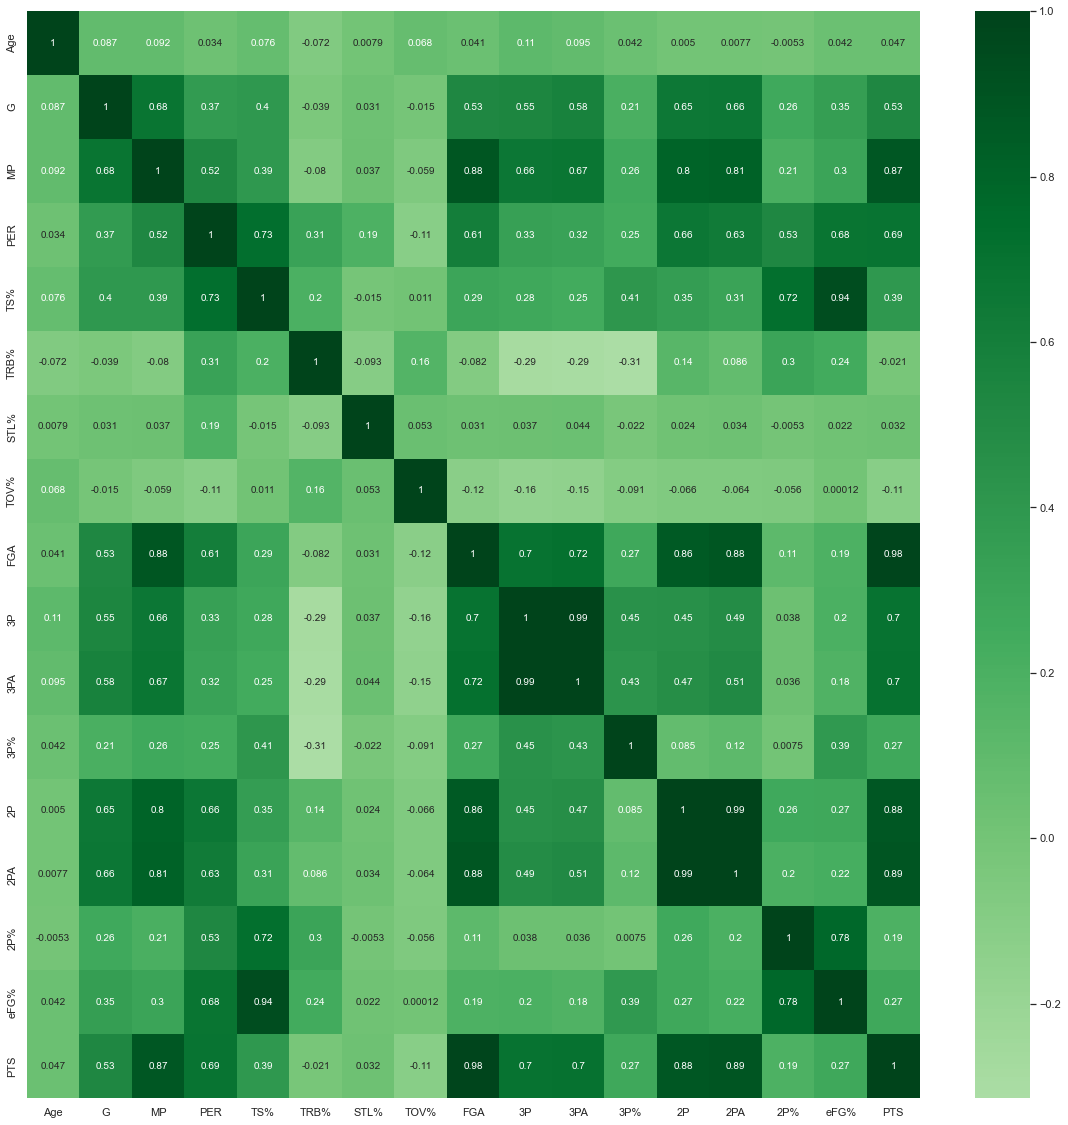

In [122]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr(), annot=True, center=0, cmap="Greens")
plt.show()

R-squared: 0.7604422268610385


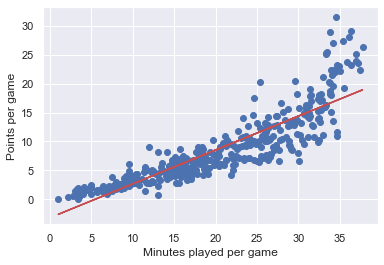

In [123]:
# Wykres punktowy, który analizuje ilość punktów na mecz w stosunku do minut rozegranych na mecz
plt.scatter(train_df["MP"],train_df["PTS"])
plt.xlabel("Minutes played per game")
plt.ylabel("Points per game")
Linear_model = LinearRegression()
Linear_model.fit(train_df[["MP"]], train_df[["PTS"]])
mp_predict = Linear_model.predict(train_df[["MP"]])
plt.plot(train_df["MP"], mp_predict, color="r")
print('R-squared:', Linear_model.score(train_df[["MP"]], train_df[["PTS"]])) # R-squared value

R-squared: 0.7887681294223099


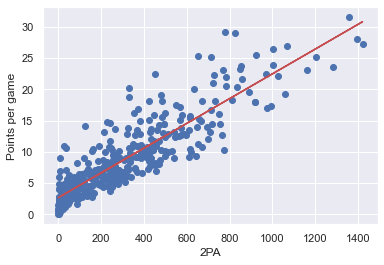

In [124]:
#  Wykres punktowy, który analizuje ilość punktów na mecz w stosunku do prób 2-punktowych rzutów z akcji
plt.scatter(train_df["2PA"], train_df["PTS"])
plt.xlabel("2PA")
plt.ylabel("Points per game")
Linear_model.fit(train_df[["2PA"]], train_df[["PTS"]])
TWPA_predict = Linear_model.predict(train_df[["2PA"]])
plt.plot(train_df["2PA"], TWPA_predict, color="r")
print('R-squared:', Linear_model.score(train_df[["2PA"]], train_df[["PTS"]]))
     

In [125]:
# MP: rozegrane minuty, PER: wskaźnik stosowany w NBA do ocenienia gracza, 
# FGA: Procent prób zdobycia rzutów z gry przez drużynę, 3PA: próby rzutów 3-punktowych
x_train = train_df[['MP','FGA', 'PER','3PA']]
y_train = train_df[['PTS']]

x_test = test_df[['MP', 'FGA', 'PER', '3PA']]
y_test = test_df[['PTS']]
     

In [126]:
# Funkcja kosztu dla regresji liniowej wielu zmiennych
def costFunction(X,y, theta):
  m=len(y)
  J=0
  J=(1/2*m)*multiply((np.transpose(multiply(theta, X)-y)), multiply(theta, X)-y)
  return J
     

In [127]:
# Dopasowanie modelu regresji liniowej
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Przewidywanie
lin_y_pred = lin_reg.predict(x_test)

# MSE - średnia kwadratowa różnicy między wartościami szacunkowymi a wartościami rzeczywistymi, im mniejszy tym lepszy
lr_mse = MSE(y_test, lin_y_pred)
print('MSE:', lr_mse)

# wartość r-squared 
lr_rsquared = r2_score(y_test, lin_y_pred)
print('R^2:', lr_rsquared)

# Wyniki
lr_df = pd.DataFrame({'Actual': np.array(y_test['PTS']), 'Predicted': lin_y_pred.flatten()}, 
                     index=test_df['Player'])

lr_df.round(1).head()

MSE: 0.8092284203851831
R^2: 0.9725095061903866


,Actual,Predicted
Player,,
Omri Casspi,5.2,5.1
Chandler Parsons,6.2,7.0
Enes Kanter,14.3,13.9
Troy Williams,6.2,6.1
Mike Conley,20.5,19.5


In [128]:
# Dopasowanie modelu regresji drzewa decyzyjnego
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(x_train, y_train)

# Przewidywanie
dt_y_pred = dt_reg.predict(x_test)

# MSE
dt_mse = MSE(y_test, dt_y_pred)
print('MSE:', dt_mse)

# wartość r-squared 
dt_rsquared = r2_score(y_test, dt_y_pred)
print('R^2:', dt_rsquared)
     

MSE: 1.4857068329316812
R^2: 0.9495286949089504


In [129]:
# Wyniki
dt_df = pd.DataFrame({'Actual': np.array(y_test['PTS']), 'Predicted': dt_y_pred.flatten()}, 
                     index=test_df['Player'])

dt_df.round(1).head()

,Actual,Predicted
Player,,
Omri Casspi,5.2,5.3
Chandler Parsons,6.2,7.2
Enes Kanter,14.3,13.3
Troy Williams,6.2,6.2
Mike Conley,20.5,18.5
